In [1]:
using NCDatasets
using DIVAnd
using PyPlot
using Random
using Printf

In [3]:
datadir = "/data/SeaDataCloud/NorthSea/"
varname = "Salinity"
obsfile = joinpath(datadir, "NorthSea_obs_salinity.nc")
obsfile_wod = joinpath(datadir, "WOD/northsea_obs_wod_salinity.nc")
isfile(obsfile) && isfile(obsfile_wod)

true

## Read the 2 files

In [4]:
@time obsvalwod, obslonwod, obslatwod, obsdepthwod, obstimewod, obsidwod = 
DIVAnd.loadobs(Float64,obsfile_wod,varname);


  9.266980 seconds (27.28 M allocations: 4.346 GiB, 17.26% gc time)


In [5]:
@time obsval,obslon, obslat, obsdepth, obstime,obsid = 
DIVAnd.loadobs(Float64,obsfile,varname);

  9.856902 seconds (23.04 M allocations: 7.059 GiB, 12.29% gc time)


## Make a plot

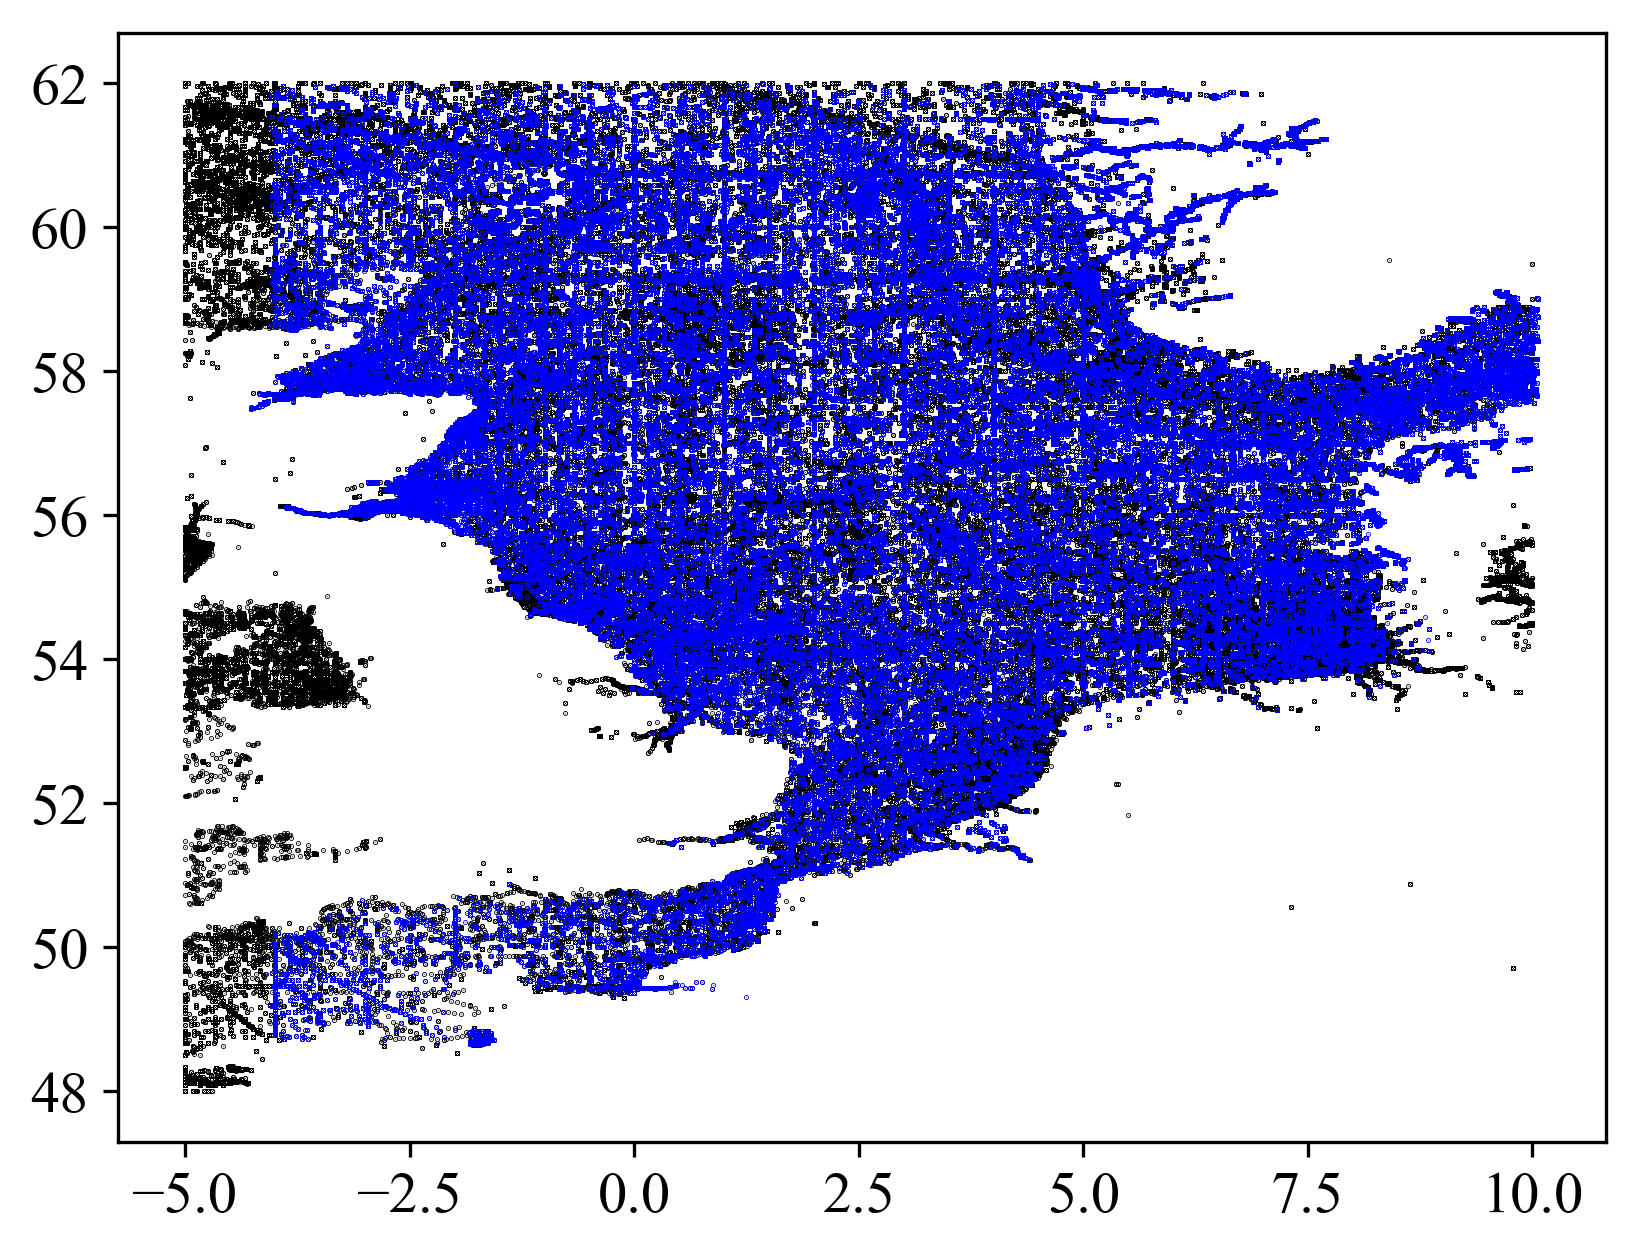

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f8ff99bdcf8>

In [8]:
obslon[obslon.>180.] .-= 360.
#PyPlot.plot(obslonwod, obslatwod, "ko", markersize=0.2)
#PyPlot.plot(obslon, obslat, "bo", markersize=0.2)

In [ ]:
@time dupl = DIVAnd.Quadtrees.checkduplicates(
    (obslon,obslat,obsdepth,obstime), obsval, 
    (obslonwod,obslatwod, obsdepthwod, obstimewod), obsvalwod,
    (0.01,0.01,0.5,1/(24*60)), 0.01);

In [ ]:
ndata1 = length(obslon);
ndata2 = length(obslonwod);
index = findall(.!isempty.(dupl));
ndupl = length(index);
@info("Number of data in dataset 1: $(ndata1)")
@info("Number of data in dataset 2: $(ndata2)")

pcdupl = round(ndupl / ndata1 * 100; digits=2);
@info("Number of possible duplicates: $ndupl")
@info("Percentage of duplicates: $pcdupl%")